In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [2]:
df= pd.read_csv('/kaggle/input/autism-prediction/Autism-prediction/train.csv')

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
df['gender'].value_counts()

gender
f    415
m    385
Name: count, dtype: int64

In [5]:
df.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [6]:
col=['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
for i in col:
    counts = df[i].value_counts()
    print(f"Value counts for column '{i}':\n{counts}\n")

Value counts for column 'gender':
gender
f    415
m    385
Name: count, dtype: int64

Value counts for column 'ethnicity':
ethnicity
White-European     211
?                  151
Asian              134
Middle Eastern     116
Black               45
Latino              44
South Asian         35
Others              24
Pasifika            18
Hispanic            16
Turkish              4
others               2
Name: count, dtype: int64

Value counts for column 'jaundice':
jaundice
no     604
yes    196
Name: count, dtype: int64

Value counts for column 'austim':
austim
no     683
yes    117
Name: count, dtype: int64

Value counts for column 'contry_of_res':
contry_of_res
United States           148
United Arab Emirates     94
New Zealand              93
India                    74
United Kingdom           58
                       ... 
Indonesia                 1
Tonga                     1
Iraq                      1
Finland                   1
Niger                     1
Name: count, Leng

In [7]:
data=df.copy()

In [8]:
data1=data.drop(['ID','relation','age_desc','contry_of_res','ethnicity'], axis=1)

In [9]:
#Now We Will Do label Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
enc=['gender','jaundice','austim','used_app_before']
# Perform one-hot encoding
data1 = pd.get_dummies(data1, columns=enc,drop_first=True,dtype=int)

In [12]:
data1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD,gender_m,jaundice_yes,austim_yes,used_app_before_yes
0,1,0,1,1,1,1,0,1,1,1,18.605397,7.819715,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,10.544296,0,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,13.167506,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61.035288,1.530098,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,7.949723,0,1,0,1,0


In [13]:
data1.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD,gender_m,jaundice_yes,austim_yes,used_app_before_yes
A1_Score,1.000000,0.244540,0.316452,0.322089,0.350073,0.291400,0.201426,0.240094,0.308672,0.308402,0.068834,0.319993,0.289991,-0.138304,0.093295,0.163893,0.044768
A2_Score,0.244540,1.000000,0.387516,0.359008,0.295492,0.361972,0.262422,0.194671,0.401893,0.342131,0.120668,0.340213,0.380703,-0.122907,0.108634,0.246594,0.053828
A3_Score,0.316452,0.387516,1.000000,0.518000,0.448251,0.489724,0.352090,0.229524,0.539535,0.460727,0.189076,0.479438,0.549618,-0.142947,0.174493,0.359190,0.022985
A4_Score,0.322089,0.359008,0.518000,1.000000,0.540342,0.447535,0.353415,0.297467,0.523767,0.439180,0.182165,0.503638,0.512792,-0.166413,0.121866,0.283196,0.055504
A5_Score,0.350073,0.295492,0.448251,0.540342,1.000000,0.411152,0.381568,0.252989,0.486979,0.436171,0.121511,0.509091,0.448473,-0.106146,0.136105,0.273182,0.036648
A6_Score,0.291400,0.361972,0.489724,0.447535,0.411152,1.000000,0.374446,0.240317,0.510524,0.402234,0.144511,0.460065,0.542588,-0.156162,0.172238,0.353182,0.025469
A7_Score,0.201426,0.262422,0.352090,0.353415,0.381568,0.374446,1.000000,0.154847,0.414423,0.310831,0.188604,0.399434,0.394660,-0.120036,0.119578,0.285386,0.019446
A8_Score,0.240094,0.194671,0.229524,0.297467,0.252989,0.240317,0.154847,1.000000,0.223737,0.250461,0.115754,0.232593,0.219034,-0.006877,0.092766,0.157560,0.025621
A9_Score,0.308672,0.401893,0.539535,0.523767,0.486979,0.510524,0.414423,0.223737,1.000000,0.488759,0.207493,0.536908,0.538688,-0.138568,0.156347,0.342321,-0.014046
A10_Score,0.308402,0.342131,0.460727,0.439180,0.436171,0.402234,0.310831,0.250461,0.488759,1.000000,0.105762,0.466246,0.439587,-0.181208,0.156517,0.270992,0.084607


<Axes: >

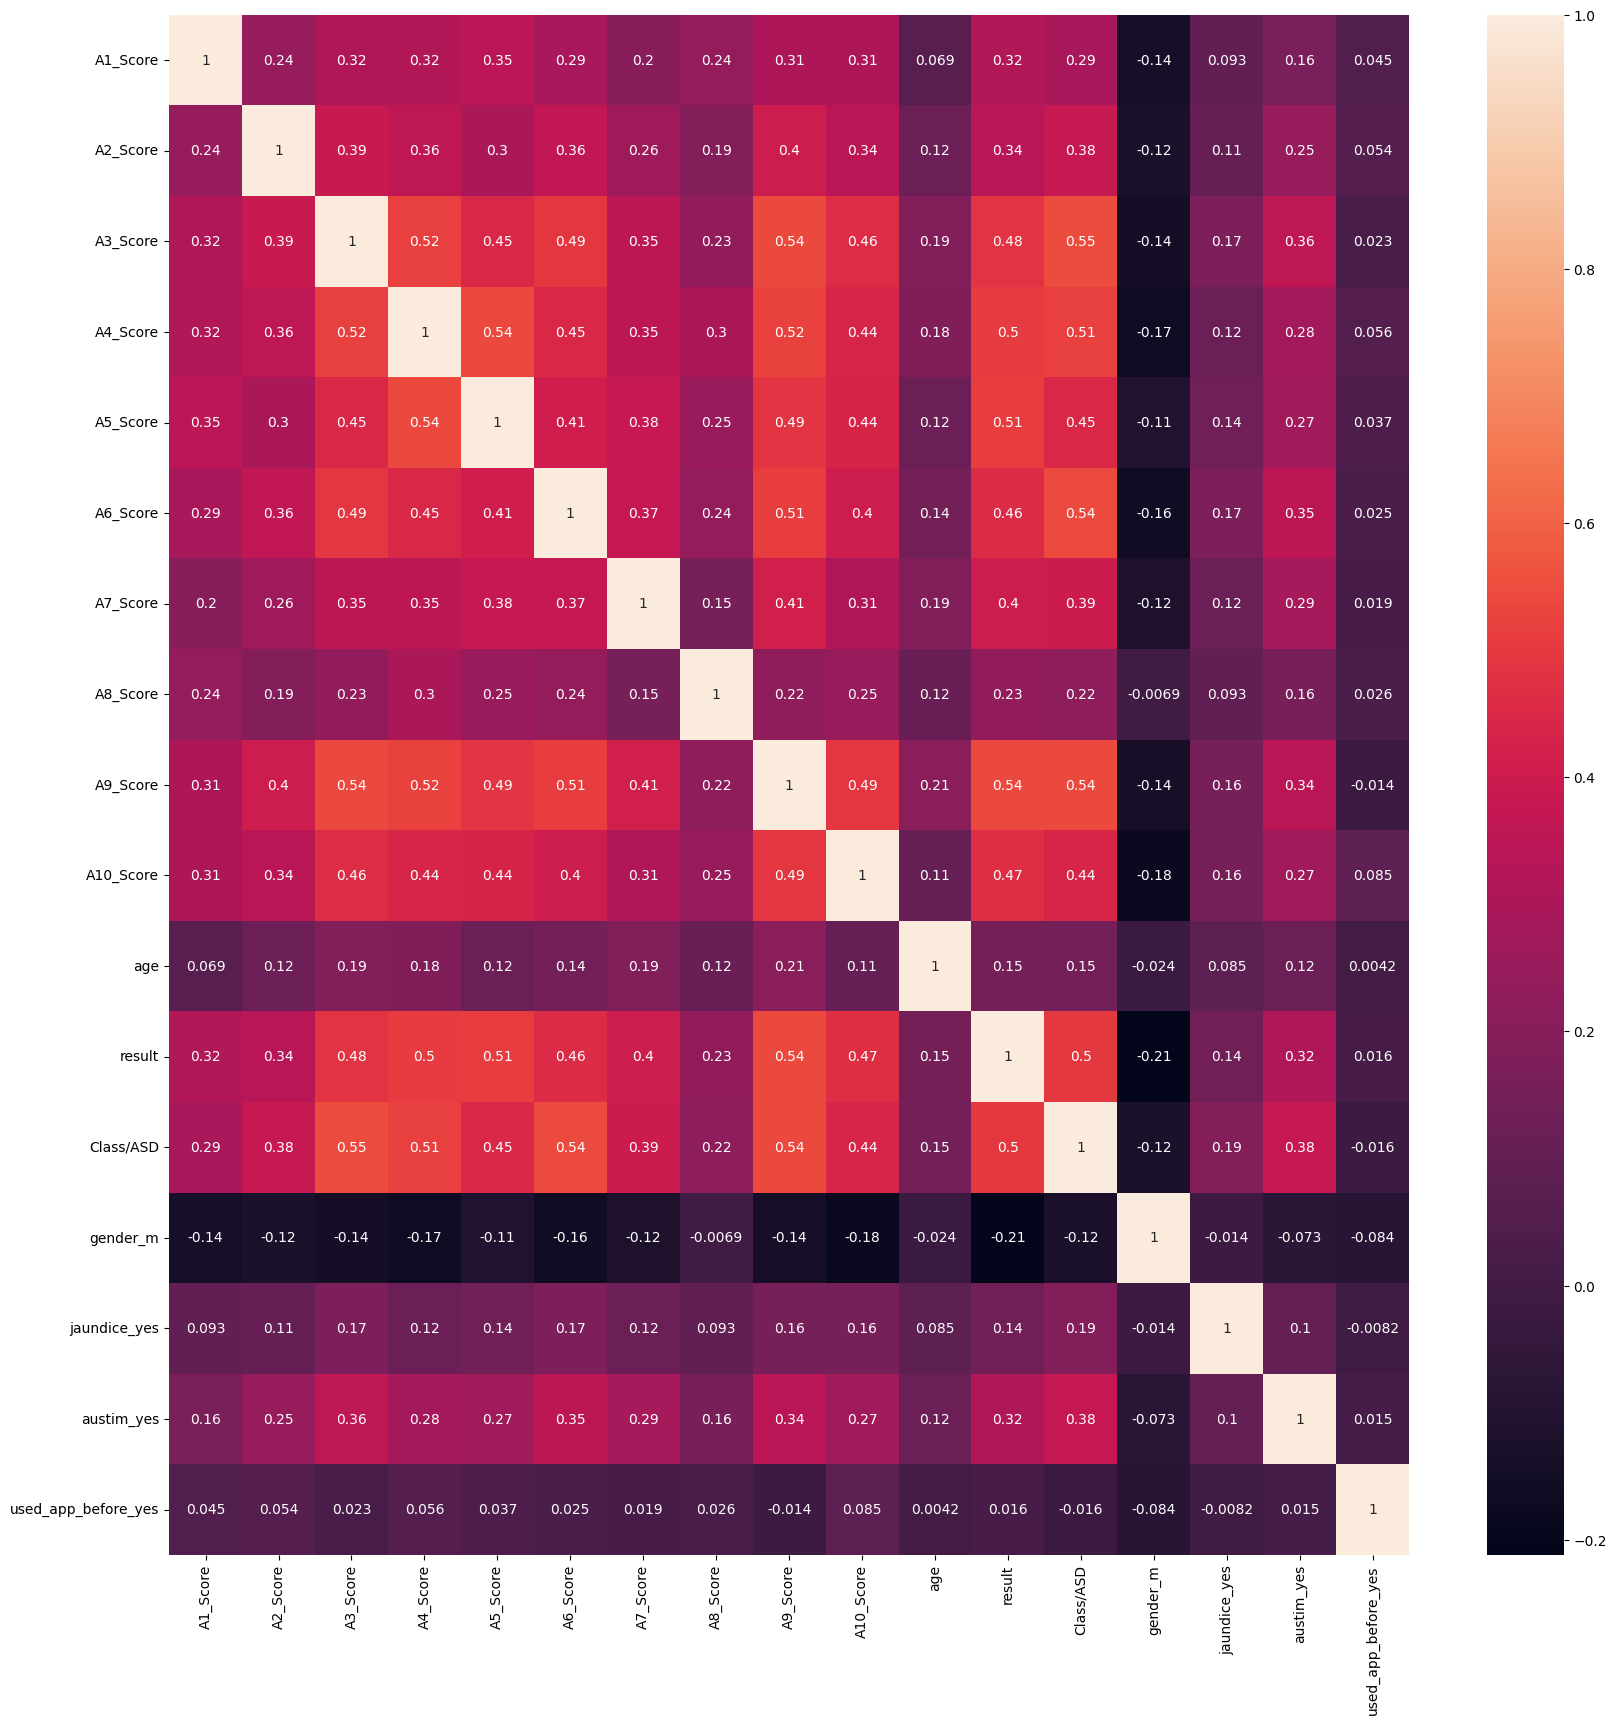

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True)

In [15]:
data1.isnull().sum()

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    0
result                 0
Class/ASD              0
gender_m               0
jaundice_yes           0
austim_yes             0
used_app_before_yes    0
dtype: int64

In [16]:
data1.isna().sum()

A1_Score               0
A2_Score               0
A3_Score               0
A4_Score               0
A5_Score               0
A6_Score               0
A7_Score               0
A8_Score               0
A9_Score               0
A10_Score              0
age                    0
result                 0
Class/ASD              0
gender_m               0
jaundice_yes           0
austim_yes             0
used_app_before_yes    0
dtype: int64

In [17]:
X=data1.drop(['Class/ASD','used_app_before_yes'],axis=1)
y=data1['Class/ASD']

In [18]:
print(X)
print(y)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         1         1         1         0   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         0   
3           0         0         0         1         0         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         1         1         1         1         1         1         1   
796         1         1         0         0         1         0         0   
797         0         0         0         0         0         0         1   
798         1         1         1         1         1         1         0   
799         1         0         0         1         1         0         0   

     A8_Score  A9_Score  A10_Score        age     result  gender_m  \
0    

In [19]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [22]:
model=LogisticRegression(max_iter=1000)

In [23]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [25]:
X_train_predict=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict,y_train)

In [26]:
ytrain=y_train.values
print(ytrain)

[1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 

In [27]:
y_train.value_counts()

Class/ASD
0    413
1    123
Name: count, dtype: int64

In [28]:
print(X_train_predict)

[0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 

In [29]:
X_train_predict_series = pd.Series(X_train_predict)
print(X_train_predict_series)

0      0
1      1
2      0
3      1
4      0
      ..
531    0
532    0
533    1
534    0
535    1
Length: 536, dtype: int64


In [30]:
X_train_predict_series.value_counts()

0    423
1    113
Name: count, dtype: int64

In [31]:
print('{0:2f}%'.format(training_data_accuracy*100))

88.805970%


In [32]:
X_test_predict=model.predict(X_test)
print(X_test_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 1]


In [33]:
report_lr=classification_report(X_test_predict,y_test)
print(report_lr)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       209
           1       0.63      0.71      0.67        55

    accuracy                           0.85       264
   macro avg       0.77      0.80      0.79       264
weighted avg       0.86      0.85      0.86       264



In [34]:
ytest=y_test.values
print(ytest)

[0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1]


In [35]:
testing_data_accuracy=accuracy_score(X_test_predict,y_test)

In [36]:
print('{0:2f}%'.format(testing_data_accuracy*100))

85.227273%


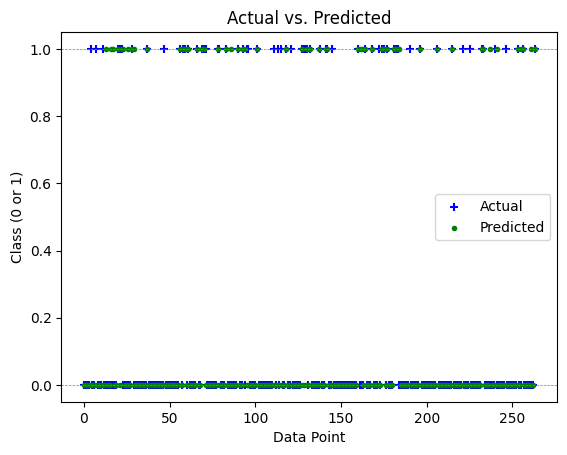

In [37]:
plt.scatter(np.arange(len(ytest)), ytest, color='blue', label='Actual',marker='+')
plt.scatter(np.arange(len(X_test_predict)), X_test_predict, color='green', label='Predicted', marker='.')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Data Point')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [39]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [40]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [41]:
X_dt_predict=clf.predict(X_test)
print(X_dt_predict)

[0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 0]


In [42]:
testing_dt_accuracy=accuracy_score(X_dt_predict,y_test)
print('{0:2f}%'.format(testing_dt_accuracy*100))

83.333333%


In [43]:
report = classification_report(y_test,X_dt_predict)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       202
           1       0.67      0.58      0.62        62

    accuracy                           0.83       264
   macro avg       0.77      0.75      0.76       264
weighted avg       0.83      0.83      0.83       264



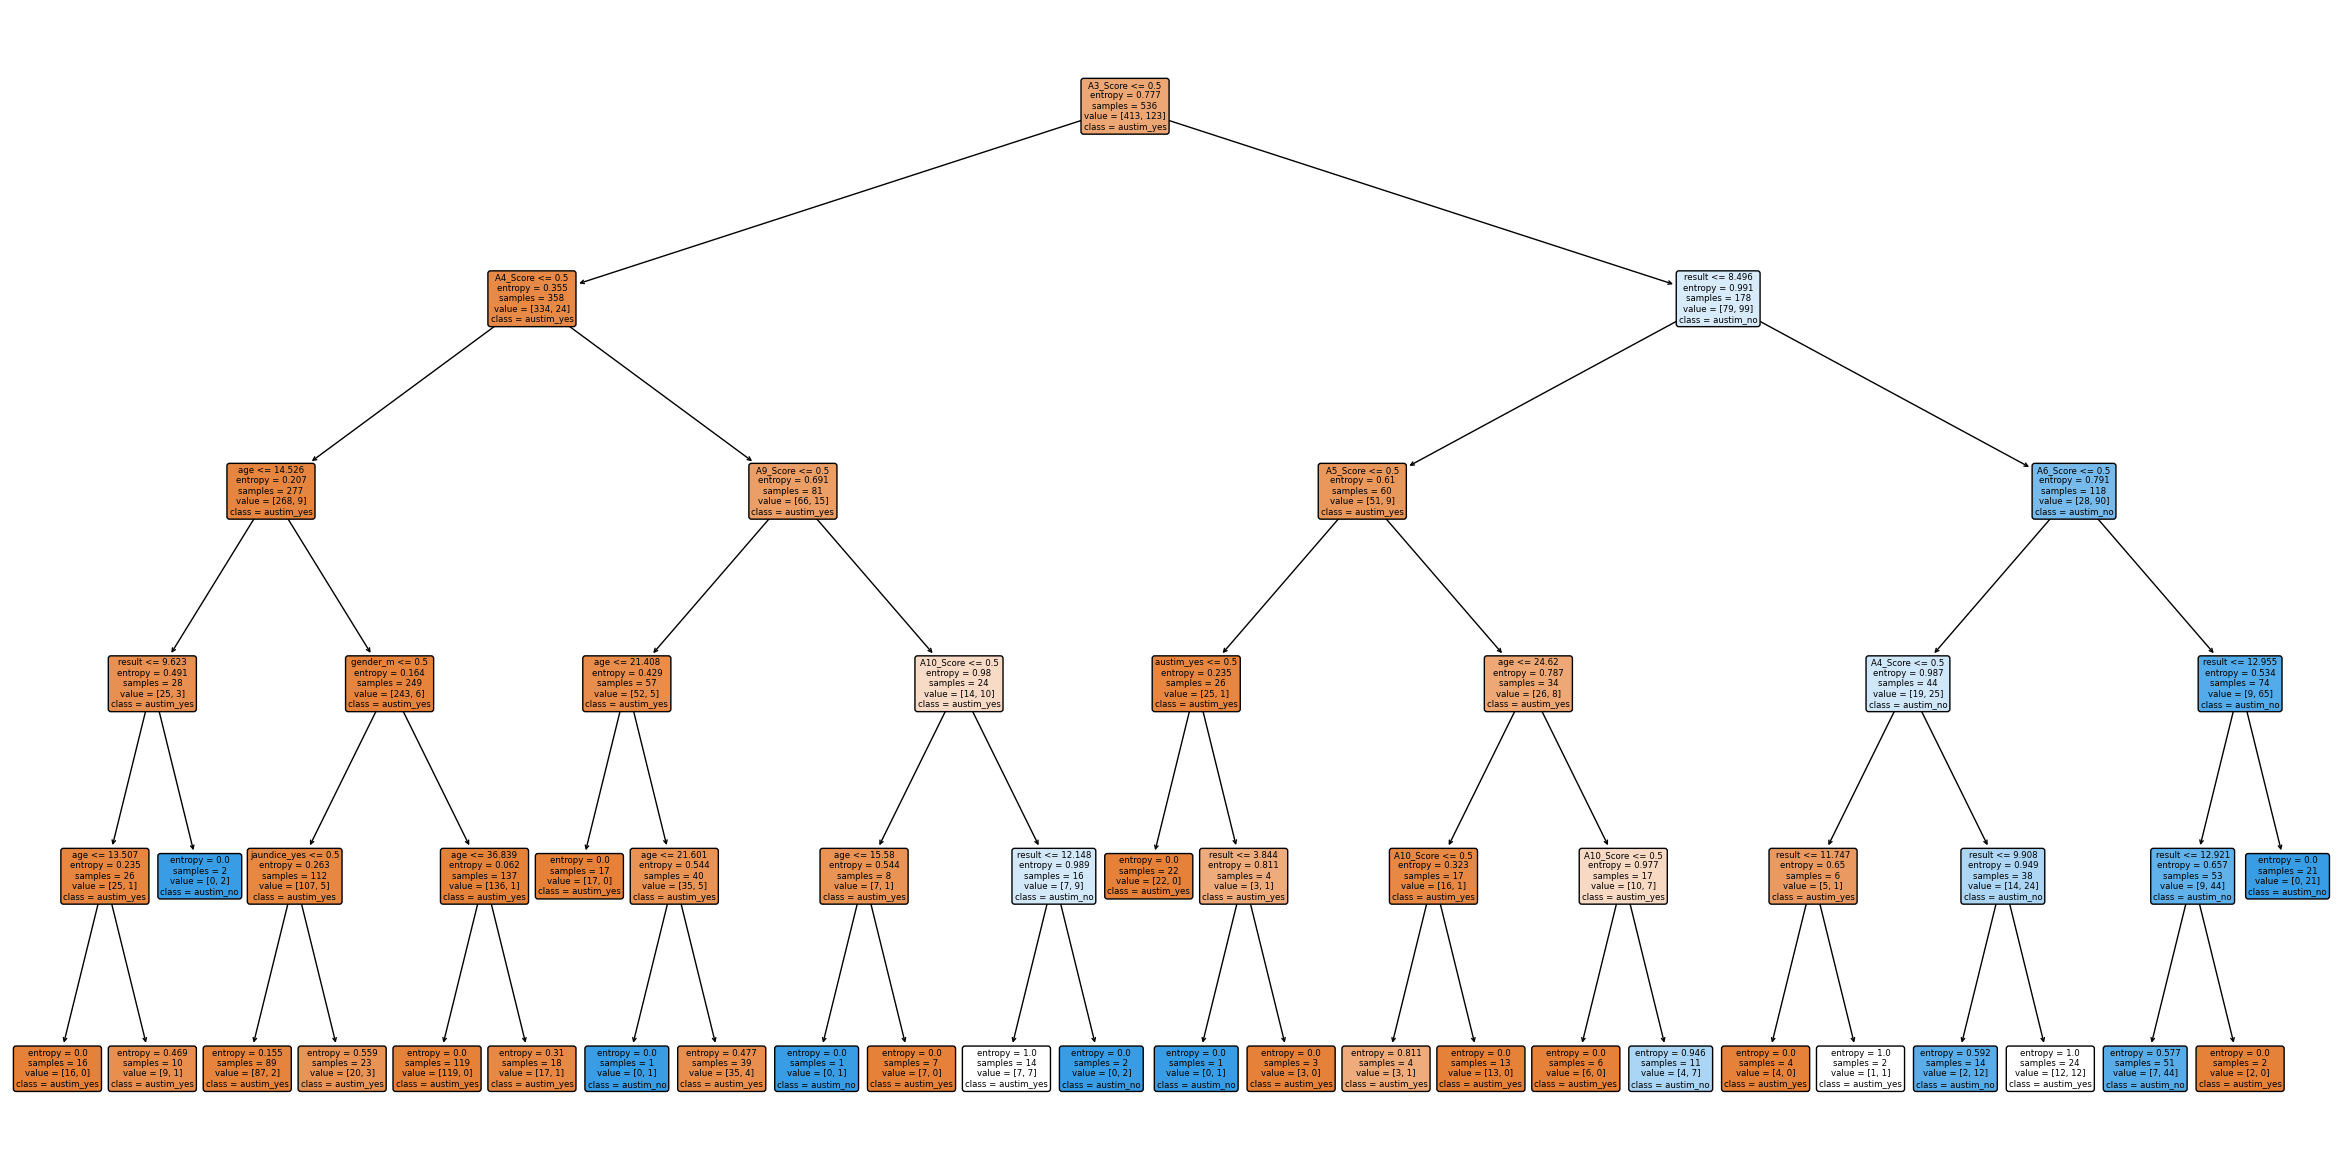

In [44]:
plt.figure(figsize=(30, 15))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['austim_yes','austim_no'], filled=True, rounded=True)
plt.show()

In [45]:
X.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result',
       'gender_m', 'jaundice_yes', 'austim_yes'],
      dtype='object')

In [46]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [47]:
RFC=RandomForestClassifier()

In [48]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
x_rfc_predict=RFC.predict(X_test)
print(x_rfc_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 1]


In [50]:
test_rfc_accuracy=accuracy_score(x_rfc_predict,y_test)
print('{0:2f}%'.format(test_rfc_accuracy*100))

85.606061%


In [51]:
report_rfc=classification_report(x_rfc_predict,y_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       216
           1       0.58      0.75      0.65        48

    accuracy                           0.86       264
   macro avg       0.76      0.81      0.78       264
weighted avg       0.88      0.86      0.86       264



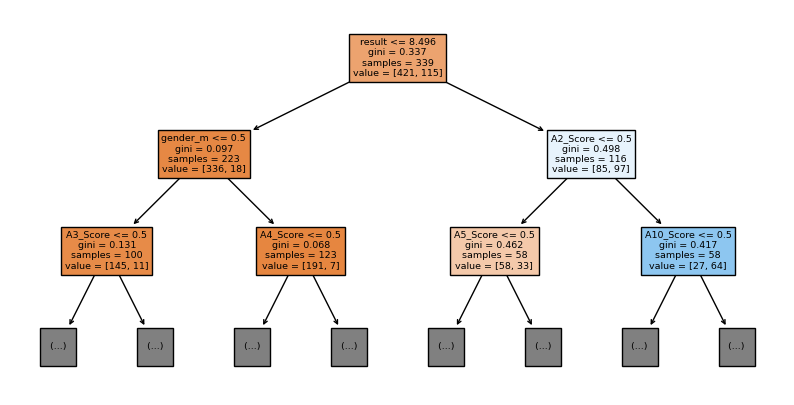

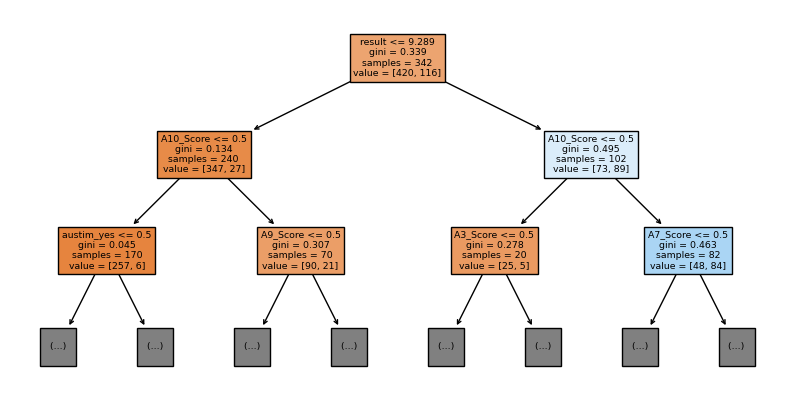

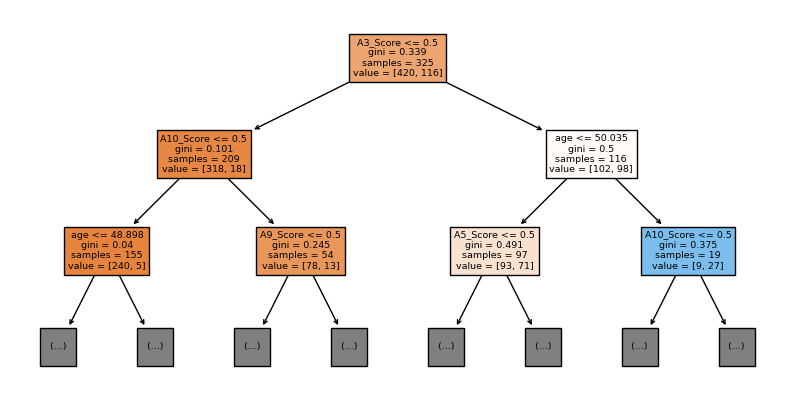

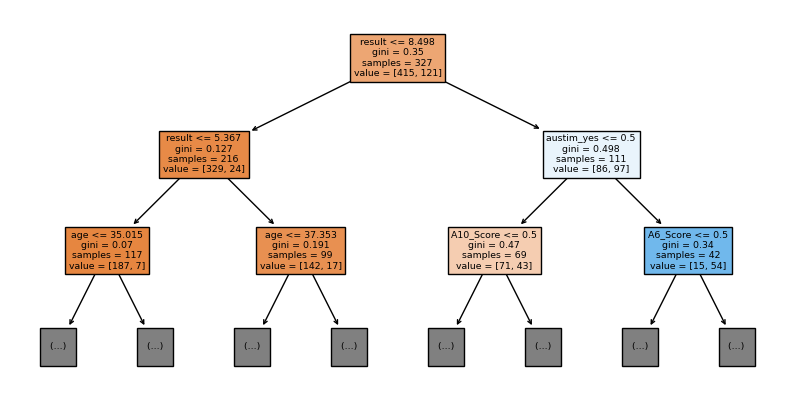

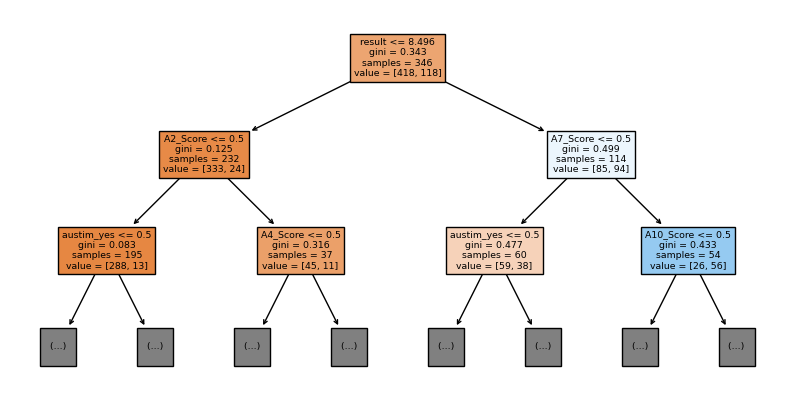

In [52]:
for i in range(5):
    tree = RFC.estimators_[i]
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    plot_tree(tree, feature_names=X_train.columns.tolist(), filled=True, max_depth=2)
    plt.show()


In [53]:
#tuning randomforestclassifier
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(RFC, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782ac6ec8760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782acc6527a0>})

In [54]:
best_rf = rand_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=4, n_estimators=380)


In [55]:
rand_search.best_params_

{'max_depth': 4, 'n_estimators': 380}

In [56]:
X_rand_predict=rand_search.predict(X_test)
print(X_rand_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 1]


In [57]:
test_rand_accuracy=accuracy_score(X_rand_predict,y_test)
print('{0:2f}%'.format(test_rand_accuracy*100))

86.742424%


In [58]:
report_rand=classification_report(X_rand_predict,y_test)
print(report_rand)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       211
           1       0.65      0.75      0.70        53

    accuracy                           0.87       264
   macro avg       0.79      0.83      0.81       264
weighted avg       0.88      0.87      0.87       264



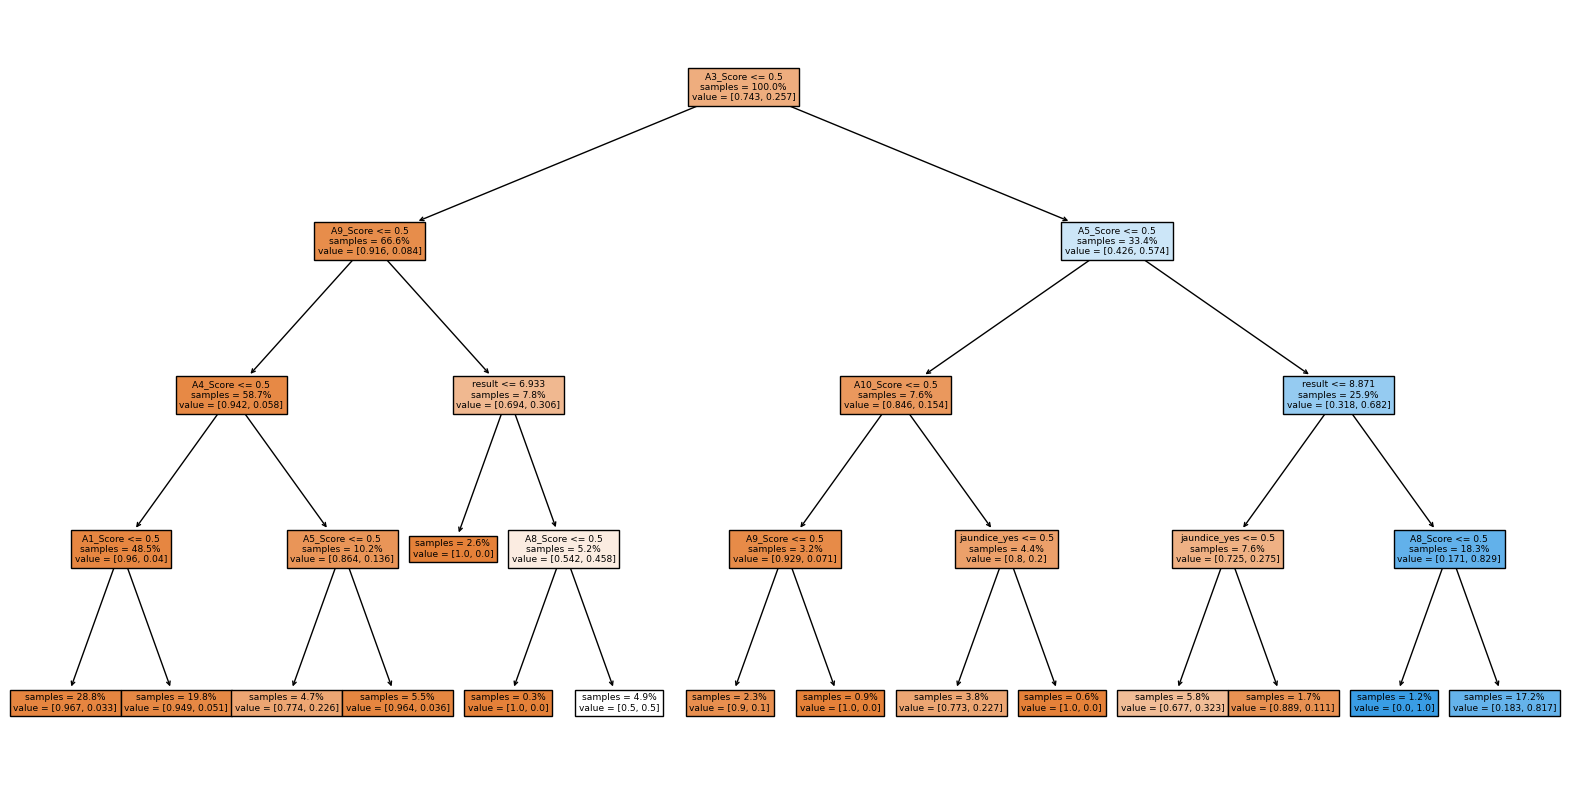

In [59]:
tree_index = 0 
chosen_tree = best_rf.estimators_[tree_index]
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(chosen_tree, feature_names=X_train.columns.tolist(), filled=True, max_depth=11, impurity=False, proportion=True)
plt.show()

In [60]:
from sklearn import svm
from sklearn.svm import SVC


In [61]:
clf = svm.SVC(kernel='linear',gamma='auto',C=2)
clf.fit(X, y)

SVC(C=2, gamma='auto', kernel='linear')

In [62]:
svm_predict=clf.predict(X_test)

In [63]:
print(100*accuracy_score(svm_predict,y_test))

86.74242424242425


In [64]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       209
           1       0.66      0.75      0.70        55

    accuracy                           0.87       264
   macro avg       0.80      0.82      0.81       264
weighted avg       0.87      0.87      0.87       264



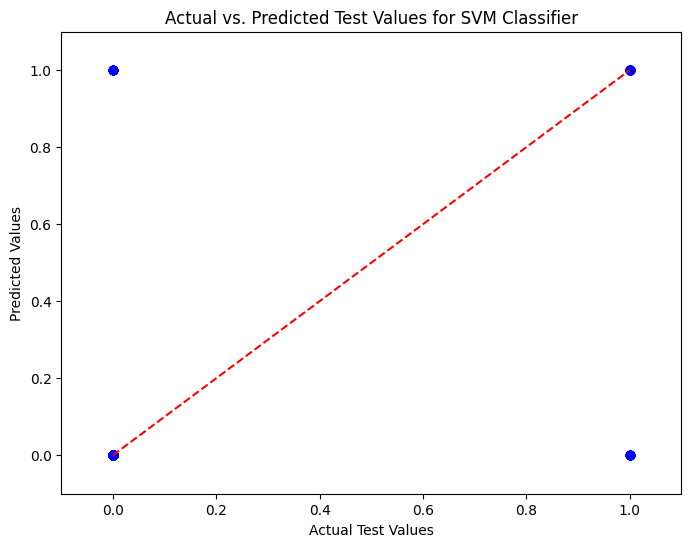

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_predict, color='blue')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Test Values for SVM Classifier')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.show()


# Now Testing the data

In [66]:
data1.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD,gender_m,jaundice_yes,austim_yes,used_app_before_yes
0,1,0,1,1,1,1,0,1,1,1,18.605397,7.819715,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,13.829369,10.544296,0,0,0,0,0
2,1,1,1,1,1,1,0,0,1,1,14.679893,13.167506,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,61.035288,1.530098,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,14.256686,7.949723,0,1,0,1,0
5,1,0,0,0,0,0,0,1,0,0,15.578191,7.445003,0,1,0,0,0
6,1,1,1,1,1,1,0,1,0,0,21.366981,12.598583,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,28.930068,3.525720,0,1,1,0,0
8,1,1,1,1,1,1,1,1,1,0,20.305943,11.902461,1,0,1,0,0
9,0,0,0,0,0,0,1,1,0,1,17.964599,8.633346,1,0,1,0,0


In [67]:
a=[1,1,1,1,1,1,0,0,1,1,14.67,13.16,0,0,0]
input_features = np.array(a).reshape(1, -1)

# Make predictions using the best_rf model
result = best_rf.predict(input_features)

# Display the prediction result
print(result)

[1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [68]:
test=pd.read_csv('/kaggle/input/autism-prediction/Autism-prediction/test.csv')

In [69]:
X_train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result',
       'gender_m', 'jaundice_yes', 'austim_yes'],
      dtype='object')

In [70]:
test1=test.copy()
test2=test1.drop(['ID','relation','age_desc','contry_of_res','ethnicity','used_app_before'], axis=1)
enc=['gender','jaundice','austim']
# Perform one-hot encoding
test2 = pd.get_dummies(test2, columns=enc,drop_first=True,dtype=int)

In [71]:
test2

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jaundice_yes,austim_yes
0,0,0,0,0,0,0,0,1,0,0,13.445319,-0.914467,1,0,0
1,1,0,0,0,1,0,0,0,0,0,25.057229,4.553447,0,1,0
2,1,0,0,1,0,1,0,1,0,0,28.799885,-1.581115,0,0,0
3,1,1,1,0,1,0,1,0,1,1,16.501526,11.779210,0,1,0
4,1,0,0,1,1,0,0,1,1,0,54.223869,10.717321,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,22.117335,6.474056,0,0,0
196,1,1,1,0,1,0,0,0,1,1,14.418935,9.114055,0,0,1
197,1,0,1,1,1,0,0,1,1,0,37.588882,8.519987,0,1,0
198,1,1,1,1,1,1,1,1,1,1,39.339539,11.740482,0,1,0


In [72]:
predictions = pd.Series(best_rf.predict(test2))

In [73]:
test2['pred']=predictions
test2

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,gender_m,jaundice_yes,austim_yes,pred
0,0,0,0,0,0,0,0,1,0,0,13.445319,-0.914467,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,25.057229,4.553447,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,28.799885,-1.581115,0,0,0,0
3,1,1,1,0,1,0,1,0,1,1,16.501526,11.779210,0,1,0,0
4,1,0,0,1,1,0,0,1,1,0,54.223869,10.717321,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,0,0,0,0,0,1,0,0,0,22.117335,6.474056,0,0,0,0
196,1,1,1,0,1,0,0,0,1,1,14.418935,9.114055,0,0,1,0
197,1,0,1,1,1,0,0,1,1,0,37.588882,8.519987,0,1,0,0
198,1,1,1,1,1,1,1,1,1,1,39.339539,11.740482,0,1,0,1
